#  Linear regression with regularization & Bias-Variance tradeoff



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin
from scipy.optimize import minimize
import scipy.io
from matplotlib import pyplot
from LinearRegression_Regularization import *

#### Loading Andrew Ng Machine learning coursera data set

In [3]:
data = scipy.io.loadmat('dataset/ex5data1.mat')

In [57]:
X, y = data['X'], data['y']
Xtest, ytest = data['Xtest'], data['ytest']
Xval, yval = data['Xval'], data['yval']
m = y.size

### Visualizing data set

Text(0, 0.5, 'Water flowing out of the dam (y)')

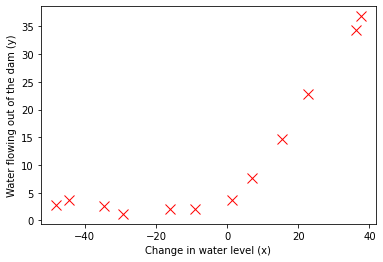

In [60]:
plt.plot(X, y, 'rx',ms=10 )
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

#### Regularized linear regression cost function

![alt text](Figures/LREquations.png)

#### Regularized linear regression gradient
![alt text](Figures/GradientDescent.png)

In [72]:
LR = LinearRegression()

#### Applying Gradient descent for linear regression

In [73]:
theta = np.array([1,1])
J,Grad = LR.gradientDescent(np.append(np.ones((m, 1)), X, axis=1), y,theta, 1)
J,Grad

(303.9931922202643, array([[-15.30301567, 598.25074417]]))

#### Optimal value of theta using scipy optimizer

In [74]:
# initializing lambda to 0
lambda_ = 0
X_aug = np.append(np.ones((m, 1)), X, axis=1)
theta = np.zeros((X_aug.shape[1],1))
theta = LR.minimumcost(LR.gradientDescent,X_aug,y,theta,lambda_)

In [75]:
theta

array([13.08790351,  0.36777923])

## High Bias

High Bias occurs when the model is too simple and is unable to fit our dataset. There exist high training and cross validation error resulting in Underfitting.

#### Ploting the graph using optimal theta

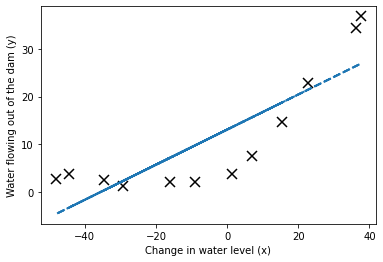

In [29]:
plt.plot(X, y, 'rx', ms=10, mec='k', mew=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, np.dot(X_aug, theta), '--', lw=2);

##### Looking at the plot, we can say that there is high bias in the data (underfitting)

#### Writing a function for generating learning curve

In [30]:
def learning_curve(X,y,Xval, yval,theta,lambda_):
    error_train = np.zeros(m)
    error_val   = np.zeros(m)
    theta = np.zeros((X.shape[1],1))
    for i in range(1,m+1):
        theta_t = LR.minimumcost(LR.gradientDescent,X[:i], y[:i],theta,lambda_)
        error_train[i-1],_ = LR.gradientDescent(X[:i], y[:i] ,theta_t, lambda_)
        error_val[i-1],_ = LR.gradientDescent(Xval, yval ,theta_t,lambda_)
    return error_train,error_val

In [31]:
X_aug = np.append(np.ones((m, 1)), X, axis=1)
Xval_aug = np.append(np.ones((yval.size, 1)), Xval, axis=1)
error_train,error_val = learning_curve(X_aug,y,Xval_aug, yval,theta,0)

In [32]:
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

  	1		0.000000	205.121096
  	2		0.000000	110.302641
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


#### Looking at the distribution, we can say that the model is too simple and is unable to fit our data set. We see high error in traning and cross validation dataset

##### Ploting the learning curve

(0.0, 13.0, 0.0, 150.0)

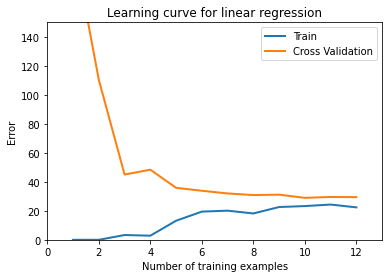

In [33]:
plt.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

#### Looking at the plot, we can say that the model is too simple and is unable to fit our data set resulting High Bias (Underfitting).

### Applying Polynomial regression to address Underfitting

In [34]:
def polyFeatures(X, p):
    X_poly = np.zeros((X.shape[0], p))
    for i in range(p):
        X_poly[:, i] = X[:, 0] ** (i + 1)
    return X_poly

In [35]:
x_new = polyFeatures(X, 8)

### Normalizing Polynomial function

In [43]:
p = 8
X_poly = polyFeatures(X, p)
X_poly,mu,sigma =  LR.featureNormalization(X_poly)
X_poly = np.append(np.ones((m, 1)), X_poly, axis=1)


Xtest_poly = polyFeatures(Xtest, p)
Xtest_poly -= mu
Xtest_poly /= sigma
Xtest_poly = np.append(np.ones((ytest.size, 1)), Xtest_poly, axis=1)


Xval_poly = polyFeatures(Xval, p)
Xval_poly -= mu
Xval_poly /= sigma
Xval_poly = np.append(np.ones((yval.size, 1)), Xval_poly, axis=1)


In [44]:
lambda_ = 100
theta = np.zeros((X_poly.shape[1],1))

In [38]:
def plotFit(polyFeatures, min_x, max_x, mu, sigma, theta, p):
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape(-1, 1)

    # Map the X values
    X_poly = polyFeatures(x, p)
    X_poly -= mu
    X_poly /= sigma

    # Add ones
    X_poly = np.concatenate([np.ones((x.shape[0], 1)), X_poly], axis=1)

    # Plot
    plt.plot(x, np.dot(X_poly, theta), '--', lw=2)

In [39]:
def plotgraph(lambda_):
    theta = np.zeros((X_poly.shape[1],1))
    theta_t = LR.minimumcost(LR.gradientDescent,X_poly, y,theta,lambda_, maxiter=55)
    plt.plot(X, y, 'rx', ms=10, mew=1.5, mec='k')
    plotFit(polyFeatures, np.min(X), np.max(X), mu, sigma, theta_t, p)
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.title('Polynomial Regression Fit (lambda = %f)' % lambda_)
    plt.ylim([-20, 50])

In [45]:
def plotlearningCurve(lambda_):
    error_train, error_val = learning_curve(X_poly, y, Xval_poly, yval,theta, lambda_)
    plt.plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_val)
    plt.legend(['Train', 'Cross Validation'])
    pyplot.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
    pyplot.xlabel('Number of training examples')
    pyplot.ylabel('Error')
    pyplot.legend(['Train', 'Cross Validation'])

    print('Polynomial Regression (lambda = %f)\n' % lambda_)
    print('# Training Examples\tTrain Error\tCross Validation Error')
    for i in range(m):
        print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

### Using Lambda = 100 resulted in High Bias (Underfitting)

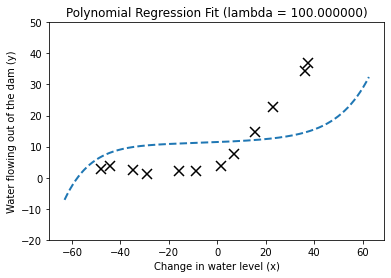

In [49]:
plotgraph(lambda_= 100)

Polynomial Regression (lambda = 100.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846777
  	2		0.114778	144.125294
  	3		112.782289	71.695530
  	4		132.620323	80.445238
  	5		117.349131	67.273539
  	6		109.921330	63.175910
  	7		94.278479	63.236140
  	8		87.319064	62.824505
  	9		81.084312	63.758942
  	10		73.915543	64.286062
  	11		67.658064	64.946123
  	12		66.733161	62.845669


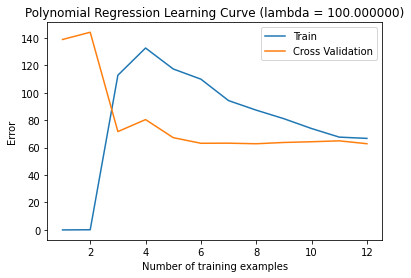

In [52]:
plotlearningCurve(lambda_= 100)

In the plot, we can see as the number of training example increases the traning and cross validation error remains constant resulting in high bias (Underfitting issue)

### Using Lambda = 0 resulted in High variance (Overfitting)

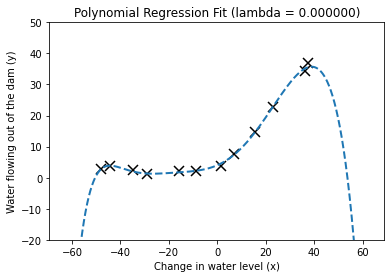

In [51]:
plotgraph(lambda_= 0)

Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	160.721900
  	2		0.000000	160.121511
  	3		0.000000	59.071639
  	4		0.000000	77.998004
  	5		0.000000	6.449913
  	6		0.000000	10.834495
  	7		0.000000	27.926514
  	8		0.001442	18.841672
  	9		0.000198	31.566155
  	10		0.017990	104.367618
  	11		0.033168	35.024723
  	12		0.036100	27.635242


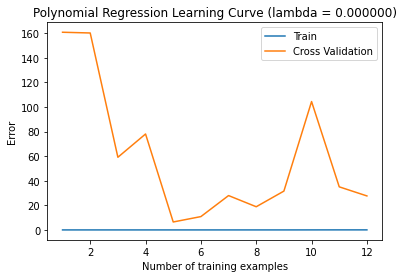

In [53]:
plotlearningCurve(lambda_= 0)

In the plot, we can see as the number of training example increases the traning error is very low. However, the cross validation error is significantly high resulting in high variance (Overfitting issue)

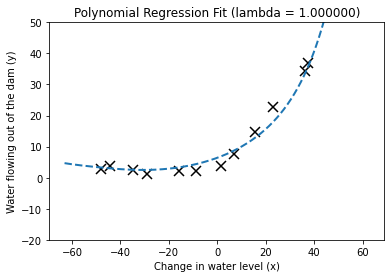

In [47]:
plotgraph(lambda_= 1)

Polynomial Regression (lambda = 1.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846778
  	2		0.072694	143.525436
  	3		18.498793	7.761485
  	4		14.575864	9.100636
  	5		11.660715	9.124906
  	6		10.118820	10.918934
  	7		9.416317	8.362313
  	8		8.256224	8.119618
  	9		7.802076	8.917596
  	10		7.064398	8.660499
  	11		6.423784	8.723248
  	12		7.268148	7.227427


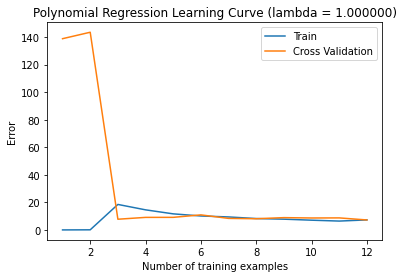

In [54]:
plotlearningCurve(lambda_= 1)

In the plot, we can see as the number of training example increases the traning error and the cross validation error decreases consistently resulting in a good model.